In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
%matplotlib inline

C:\Users\peren\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
def count_error(subset, expt):
    cnt = 0
    pred = knn.predict(subset)
    for i in range(0, len(pred)):
        if (pred[i] != expt[i]):
            cnt += 1

    return cnt

In [3]:
feature_list = ["baseline value", "accelerations", "fetal_movement", "uterine_contractions", "light_decelerations", "severe_decelerations", "prolongued_decelerations", "abnormal_short_term_variability", "mean_value_of_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability", "mean_value_of_long_term_variability", "histogram_width", "histogram_min", "histogram_max", "histogram_number_of_peaks", "histogram_number_of_zeroes", "histogram_mode", "histogram_mean", "histogram_median", "histogram_variance", "histogram_tendency"]

In [4]:
fetal = pd.read_csv("fetal_health.csv")
X = fetal.drop(["fetal_health",],axis=1)
y = fetal["fetal_health"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state=123,
                                                    stratify=y)

In [6]:
fetal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
fetal.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [8]:
np.bincount(y)

array([   0, 1655,  295,  176], dtype=int64)

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

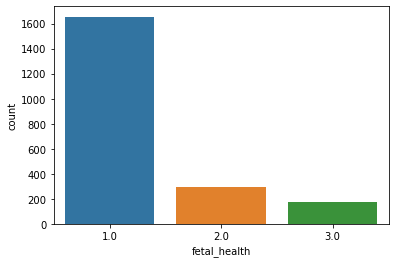

In [9]:
sns.countplot(data= fetal, x="fetal_health")

In [46]:
def get_results_simple(model, prediction): # 간단한 모델은 여기
    result_dict = dict()
    accuracy = round(accuracy_score(y_test, prediction),4)
    recall = round(recall_score(y_test, prediction, average = "weighted", labels = np.unique(prediction)), 4)
    precision = round(precision_score(y_test, prediction, average = "weighted", labels = np.unique(prediction)), 4)
    f1 = round(f1_score(y_test, prediction, average = "micro", labels = np.unique(prediction)), 4)
    result_dict["accuracy"] = accuracy
    result_dict["recall"] = recall
    result_dict["f1_score"] = f1
    result_dict["precision"] = precision
    
    return result_dict

In [34]:
def get_results_complic(model, prediction): # 복잡한 모델은 여기: 여기도 y_test-1 해줘야 해서.
    result_dict = dict()
    accuracy = round(accuracy_score(y_test-1, prediction),4)
    recall = round(recall_score(y_test-1, prediction, average = "weighted", labels = np.unique(prediction)), 4)
    precision = round(precision_score(y_test-1, prediction, average = "weighted", labels = np.unique(prediction)), 4)
    f1 = round(f1_score(y_test-1, prediction, average = "micro", labels = np.unique(prediction)), 4)
    result_dict["accuracy"] = accuracy
    result_dict["recall"] = recall
    result_dict["f1_score"] = f1
    result_dict["precision"] = precision
    
    return result_dict

# 1. Decision Tree

## 1-1. Decision Tree (using Grid Search)

In [11]:
clf = DecisionTreeClassifier(random_state=123)

params =  {
    'min_samples_split': [2, 3, 4],
    'max_depth': [6, 16, None]
}

grid = GridSearchCV(estimator=clf,
                    param_grid=params,
                    cv=100,
                    n_jobs=1,
                    verbose=2)

grid.fit(X_train, y_train)

grid.best_score_

Fitting 100 folds for each of 9 candidates, totalling 900 fits
[CV] END ...................max_depth=6, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=6, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=6, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=6, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=6, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=6, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=6, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=6, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=6, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=6, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=6, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=6, min_s

0.9217647058823529

In [12]:
grid.best_params_

{'max_depth': 16, 'min_samples_split': 3}

In [13]:
tree = DecisionTreeClassifier(random_state=123, max_depth = 16, min_samples_split = 3)
tree.fit(X_train, y_train)

print(f"Training Accuracy: {tree.score(X_train, y_train):0.3f}")
print(f"Test Accuracy: {tree.score(X_test, y_test):0.3f}")

Training Accuracy: 0.996
Test Accuracy: 0.925


In [14]:
prediction = tree.predict(X_test)
dt_grid_result = get_results(tree, prediction)
dt_grid_result 

{'accuracy': 0.9249, 'recall': 0.9249, 'f1_score': 0.9249, 'precision': 0.9242}

## 1-2. Decision Tree (using RandomSearch)

In [15]:
clf = DecisionTreeClassifier(random_state=123)

params =  {
    'min_samples_split': scipy.stats.randint(2, 12),
    'min_impurity_decrease': scipy.stats.uniform(0.0, 0.5),
    'max_depth': [6, 16, None]
}

search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=params,
    n_iter=50,
    cv=10,
    verbose=2,
    n_jobs=1)

search.fit(X_train, y_train)

search.best_score_

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END max_depth=None, min_impurity_decrease=0.27122375891690836, min_samples_split=7; total time=   0.0s
[CV] END max_depth=None, min_impurity_decrease=0.27122375891690836, min_samples_split=7; total time=   0.0s
[CV] END max_depth=None, min_impurity_decrease=0.27122375891690836, min_samples_split=7; total time=   0.0s
[CV] END max_depth=None, min_impurity_decrease=0.27122375891690836, min_samples_split=7; total time=   0.0s
[CV] END max_depth=None, min_impurity_decrease=0.27122375891690836, min_samples_split=7; total time=   0.0s
[CV] END max_depth=None, min_impurity_decrease=0.27122375891690836, min_samples_split=7; total time=   0.0s
[CV] END max_depth=None, min_impurity_decrease=0.27122375891690836, min_samples_split=7; total time=   0.0s
[CV] END max_depth=None, min_impurity_decrease=0.27122375891690836, min_samples_split=7; total time=   0.0s
[CV] END max_depth=None, min_impurity_decrease=0.27122375891690836, min_s

0.9241176470588236

In [16]:
search.best_params_

{'max_depth': None,
 'min_impurity_decrease': 0.0011620615395586675,
 'min_samples_split': 3}

In [17]:
print(f"Training Accuracy: {search.best_estimator_.score(X_train, y_train):0.3f}")
print(f"Test Accuracy: {search.best_estimator_.score(X_test, y_test):0.3f}")

Training Accuracy: 0.971
Test Accuracy: 0.913


In [18]:
prediction = search.predict(X_test)
dt_random_result = get_results(search, prediction)
dt_random_result 

{'accuracy': 0.9131, 'recall': 0.9131, 'f1_score': 0.9131, 'precision': 0.9108}

# 2. Gradient Boosting

In [37]:
boost = XGBClassifier(random_state=123, verbosity=0, use_label_encoder=False)
# if we just use y_train,
# ValueError: The label must consist of integer labels of form 0, 1, 2, ..., [num_class - 1].
boost.fit(X_train, y_train-1) 
print(f"Training Accuracy: {boost.score(X_train, y_train-1):0.3f}")
print(f"Test Accuracy: {boost.score(X_test, y_test-1):0.3f}")

Training Accuracy: 1.000
Test Accuracy: 0.958


In [38]:
prediction = boost.predict(X_test)
boosting_result =  get_results_complic(boost, prediction)
boosting_result 

{'accuracy': 0.9577, 'recall': 0.9577, 'f1_score': 0.9577, 'precision': 0.9575}

# 3. Stacking

## 3-1. Stacking (RF + Boost => Logistic Regression)

In [39]:
forest = RandomForestClassifier(n_estimators=100,
                                random_state=123)

metaclassifier = LogisticRegression(random_state=123)

sclf = StackingCVClassifier(classifiers=[forest, boost], 
                            meta_classifier=metaclassifier)

sclf.fit(X_train, y_train-1)
print(f"Training Accuracy: {sclf.score(X_train, y_train-1):0.3f}")
print(f"Test Accuracy: {sclf.score(X_test, y_test-1):0.3f}")

Training Accuracy: 1.000
Test Accuracy: 0.944


In [40]:
prediction = sclf.predict(X_test)
stacking_2_result = get_results_complic(sclf, prediction)
stacking_2_result 

{'accuracy': 0.9437, 'recall': 0.9437, 'f1_score': 0.9437, 'precision': 0.9423}

## 3-2. Stacking (KNN + RF + AdaBoost + DT + HistGDBoost => Logistic Regression)

In [41]:
clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = RandomForestClassifier(random_state=123)
clf3 = AdaBoostClassifier(random_state=123)
clf4 = DecisionTreeClassifier(random_state=123,
                              max_depth=None)
clf5 = HistGradientBoostingClassifier(random_state=123)

lr = LogisticRegression(random_state=123)

sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5], meta_classifier=lr)

sclf.fit(X_train, y_train-1)
print("Training Accuracy: %0.3f" % sclf.score(X_train, y_train-1))
print("Test Accuracy: %0.3f" % sclf.score(X_test, y_test-1))

Training Accuracy: 1.000
Test Accuracy: 0.937


In [42]:
prediction = sclf.predict(X_test)
stacking_5_result = get_results_complic(sclf, prediction)
stacking_5_result 

{'accuracy': 0.9366, 'recall': 0.9366, 'f1_score': 0.9366, 'precision': 0.9352}

## 3-3. Stacking using RandomizedSearch

In [24]:
pipe = make_pipeline(sclf)

params = {
    'stackingcvclassifier__use_probas': [True],
    #'stackingcvclassifier__drop_proba_col': [None, 'last'],
    'stackingcvclassifier__xgbclassifier__reg_alpha': scipy.stats.loguniform(1e-5, 1),
    'stackingcvclassifier__xgbclassifier__max_depth': [2, 4, 6, 8],
    'stackingcvclassifier__randomforestclassifier__n_estimators': [10, 100]
}


search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=params,
    n_iter=50,
    cv=10,
    verbose=2,
    n_jobs=1)

search.fit(X_train, y_train-1)
search.best_score_

Fitting 10 folds for each of 50 candidates, totalling 500 fits


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\peren\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-24-9e98063f03ac>", line 20, in <module>
    search.fit(X_train, y_train-1)
  File "C:\Users\peren\anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 891, in fit
    self._run_search(evaluate_candidates)
  File "C:\Users\peren\anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 1766, in _run_search
    evaluate_candidates(
  File "C:\Users\peren\anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 838, in evaluate_candidates
    out = parallel(
  File "C:\Users\peren\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\peren\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:

TypeError: object of type 'NoneType' has no len()

In [ ]:
search.best_params_

In [ ]:
print(f"Training Accuracy: {search.best_estimator_.score(X_train, y_train-1):0.3f}")
print(f"Test Accuracy: {search.best_estimator_.score(X_test, y_test-1):0.3f}")

## 4. AdaBoost


In [43]:
tree = DecisionTreeClassifier(criterion='entropy',
                              random_state=123,
                              max_depth=1)


boost = AdaBoostClassifier(base_estimator=tree,
                           n_estimators=500,
                           algorithm='SAMME',
                           #n_jobs=1,
                           random_state=123)

boost.fit(X_train, y_train)
    
    
print("Train Accuracy: %0.3f" % boost.score(X_train, y_train))
print("Test Accuracy: %0.3f" % boost.score(X_test, y_test))

Train Accuracy: 0.926
Test Accuracy: 0.899


In [47]:
prediction = boost.predict(X_test)
ada_result = get_results_simple(boost, prediction)
ada_result 

{'accuracy': 0.8991, 'recall': 0.8991, 'f1_score': 0.8991, 'precision': 0.8978}

## Section 2: After Feature Selection

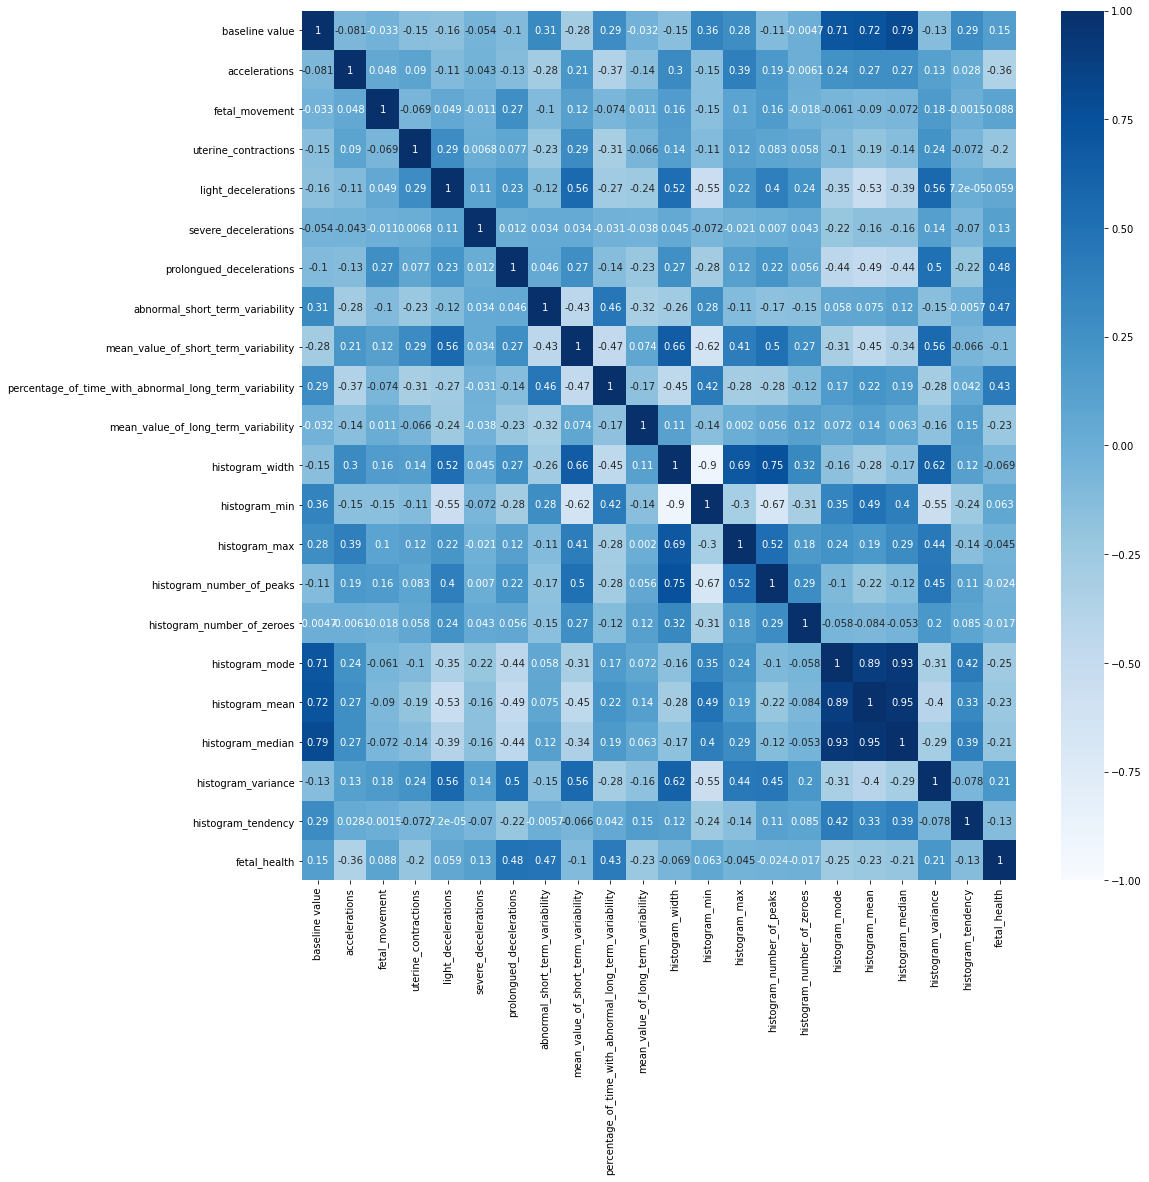

In [48]:
corr = fetal.corr()
ax, fig = plt.subplots(figsize=(16,16))
sns.heatmap(corr, vmin=-1, cmap='Blues', annot=True)
plt.show()
plt.close()

In [49]:
corr[abs(corr['fetal_health']) > 0.10]['fetal_health'] # 왜 여기서 절댓값?

baseline value                                            0.148151
accelerations                                            -0.364066
uterine_contractions                                     -0.204894
severe_decelerations                                      0.131934
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
mean_value_of_short_term_variability                     -0.103382
percentage_of_time_with_abnormal_long_term_variability    0.426146
mean_value_of_long_term_variability                      -0.226797
histogram_mode                                           -0.250412
histogram_mean                                           -0.226985
histogram_median                                         -0.205033
histogram_variance                                        0.206630
histogram_tendency                                       -0.131976
fetal_health                                              1.00

In [50]:
X = fetal[corr[abs(corr['fetal_health']) > 0.10]['fetal_health'].index]
X = X.drop(['fetal_health'], axis=1)
y = fetal['fetal_health']

In [51]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
s_scaler = preprocessing.StandardScaler()
X_trans= s_scaler.fit_transform(X)
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)
X_trans

array([[-1.35222005, -0.8223883 , -1.48246456, ..., -1.18164215,
         1.87056871,  1.11298001],
       [-0.1325256 ,  0.73013282,  0.55462667, ...,  0.13203796,
        -0.23499819, -0.52452553],
       [-0.03088439, -0.04612774,  1.23365708, ..., -0.00624416,
        -0.2004807 , -0.52452553],
       ...,
       [ 0.68060404, -0.56363478,  0.89414188, ...,  0.96173066,
        -0.51113811,  1.11298001],
       [ 0.68060404, -0.56363478,  0.55462667, ...,  0.8925896 ,
        -0.51113811,  1.11298001],
       [ 0.88388645, -0.30488126,  1.23365708, ...,  0.47774325,
        -0.61469058, -0.52452553]])

# 1. Decision Tree
## 1-1. Decision Tree (using Grid Search)

In [52]:
clf = DecisionTreeClassifier(random_state=123)

params =  {
    'min_samples_split': [2, 3, 4],
    'max_depth': [6, 16, None]
}

grid = GridSearchCV(estimator=clf,
                    param_grid=params,
                    cv=100,
                    n_jobs=1,
                    verbose=2)

grid.fit(X_train, y_train)

grid.best_score_

Fitting 100 folds for each of 9 candidates, totalling 900 fits
[CV] END ...................max_depth=6, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=6, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=6, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=6, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=6, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=6, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=6, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=6, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=6, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=6, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=6, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=6, min_s

0.9255238095238095

In [53]:
grid.best_params_

{'max_depth': 16, 'min_samples_split': 3}

In [54]:
tree = DecisionTreeClassifier(random_state=123, max_depth = 16, min_samples_split = 3)
tree.fit(X_train, y_train)

print(f"Training Accuracy: {tree.score(X_train, y_train):0.3f}")
print(f"Test Accuracy: {tree.score(X_test, y_test):0.3f}")

Training Accuracy: 0.994
Test Accuracy: 0.920


In [56]:
prediction = tree.predict(X_test)
dt_grid_after_result = get_results_simple(tree, prediction)
dt_grid_after_result

{'accuracy': 0.9201, 'recall': 0.9201, 'f1_score': 0.9201, 'precision': 0.9211}

## 1-2. Decision Tree (using RandomSearch)

In [57]:
clf = DecisionTreeClassifier(random_state=123)

params =  {
    'min_samples_split': scipy.stats.randint(2, 12),
    'min_impurity_decrease': scipy.stats.uniform(0.0, 0.5),
    'max_depth': [6, 16, None]
}

search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=params,
    n_iter=50,
    cv=10,
    verbose=2,
    n_jobs=1)

search.fit(X_train, y_train)

search.best_score_

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END max_depth=None, min_impurity_decrease=0.2775356436837779, min_samples_split=6; total time=   0.0s
[CV] END max_depth=None, min_impurity_decrease=0.2775356436837779, min_samples_split=6; total time=   0.0s
[CV] END max_depth=None, min_impurity_decrease=0.2775356436837779, min_samples_split=6; total time=   0.0s
[CV] END max_depth=None, min_impurity_decrease=0.2775356436837779, min_samples_split=6; total time=   0.0s
[CV] END max_depth=None, min_impurity_decrease=0.2775356436837779, min_samples_split=6; total time=   0.0s
[CV] END max_depth=None, min_impurity_decrease=0.2775356436837779, min_samples_split=6; total time=   0.0s
[CV] END max_depth=None, min_impurity_decrease=0.2775356436837779, min_samples_split=6; total time=   0.0s
[CV] END max_depth=None, min_impurity_decrease=0.2775356436837779, min_samples_split=6; total time=   0.0s
[CV] END max_depth=None, min_impurity_decrease=0.2775356436837779, min_samples_sp

0.927417014329766

In [58]:
search.best_params_

{'max_depth': None,
 'min_impurity_decrease': 5.272590091692786e-05,
 'min_samples_split': 6}

In [59]:
print(f"Training Accuracy: {search.best_estimator_.score(X_train, y_train):0.3f}")
print(f"Test Accuracy: {search.best_estimator_.score(X_test, y_test):0.3f}")

Training Accuracy: 0.983
Test Accuracy: 0.922


In [60]:
prediction = search.predict(X_test)
dt_random_after_result = get_results_simple(search, prediction)
dt_random_after_result

{'accuracy': 0.9216, 'recall': 0.9216, 'f1_score': 0.9216, 'precision': 0.9241}

# 2. Gradient Boosting

In [61]:
boost = XGBClassifier(random_state=123, verbosity=0, use_label_encoder=False)
boost.fit(X_train, y_train-1)
print(f"Training Accuracy: {boost.score(X_train, y_train-1):0.3f}")
print(f"Test Accuracy: {boost.score(X_test, y_test-1):0.3f}")

Training Accuracy: 0.999
Test Accuracy: 0.948


In [63]:
prediction = boost.predict(X_test)
gradientboosting_after_result = get_results_complic(boost, prediction)
gradientboosting_after_result

{'accuracy': 0.9483, 'recall': 0.9483, 'f1_score': 0.9483, 'precision': 0.9471}

# 3. Stacking

## 3-1. Stacking (RF + Boost => Logistic Regression)

In [65]:
forest = RandomForestClassifier(n_estimators=100,
                                random_state=123)

metaclassifier = LogisticRegression(random_state=123)

sclf = StackingCVClassifier(classifiers=[forest, boost], 
                            meta_classifier=metaclassifier)

sclf.fit(X_train, y_train-1)
print(f"Training Accuracy: {sclf.score(X_train, y_train-1):0.3f}")
print(f"Test Accuracy: {sclf.score(X_test, y_test-1):0.3f}")

Training Accuracy: 0.999
Test Accuracy: 0.940


In [66]:
prediction = sclf.predict(X_test)
stacking_2_after_result = get_results_complic(sclf, prediction)
stacking_2_after_result

{'accuracy': 0.9404, 'recall': 0.9404, 'f1_score': 0.9404, 'precision': 0.9384}

## 3-2. Stacking (KNN + RF + AdaBoost + DT + HistGDBoost => Logistic Regression)

In [67]:
clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = RandomForestClassifier(random_state=123)
clf3 = AdaBoostClassifier(random_state=123)
clf4 = DecisionTreeClassifier(random_state=123,
                              max_depth=None)
clf5 = HistGradientBoostingClassifier(random_state=123)

lr = LogisticRegression(random_state=123)

sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5], meta_classifier=lr)

sclf.fit(X_train, y_train-1)
print("Training Accuracy: %0.3f" % sclf.score(X_train, y_train-1))
print("Test Accuracy: %0.3f" % sclf.score(X_test, y_test-1))

Training Accuracy: 0.999
Test Accuracy: 0.934


In [68]:
prediction = sclf.predict(X_test)
stacking_5_after_result = get_results_complic(sclf, prediction)
stacking_5_after_result

{'accuracy': 0.9342, 'recall': 0.9342, 'f1_score': 0.9342, 'precision': 0.9354}

## 3-3. Stacking using RandomizedSearch

In [ ]:
pipe = make_pipeline(sclf)

params = {
    'stackingcvclassifier__use_probas': [True],
    #'stackingcvclassifier__drop_proba_col': [None, 'last'],
    'stackingcvclassifier__xgbclassifier__reg_alpha': scipy.stats.loguniform(1e-5, 1),
    'stackingcvclassifier__xgbclassifier__max_depth': [2, 4, 6, 8],
    'stackingcvclassifier__randomforestclassifier__n_estimators': [10, 100]
}


search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=params,
    n_iter=50,
    cv=10,
    verbose=2,
    n_jobs=1)

search.fit(X_train, y_train-1)
search.best_score_

## 4. Adaboost

In [69]:
tree = DecisionTreeClassifier(criterion='entropy',
                              random_state=123,
                              max_depth=1)


boost = AdaBoostClassifier(base_estimator=tree,
                           n_estimators=500,
                           algorithm='SAMME',
                           #n_jobs=1,
                           random_state=123)

boost.fit(X_train, y_train)
    
    
print("Train Accuracy: %0.3f" % boost.score(X_train, y_train))
print("Test Accuracy: %0.3f" % boost.score(X_test, y_test))

Train Accuracy: 0.912
Test Accuracy: 0.897


In [71]:
prediction = boost.predict(X_test)
ada_after_result = get_results_simple(boost, prediction) 
ada_after_result

{'accuracy': 0.8966, 'recall': 0.8966, 'f1_score': 0.8966, 'precision': 0.8939}

### Results Plotting

In [73]:
before_fg_train = dict()
before_fg_train["DecisionTree(GridSearch)"] = 0.996
before_fg_train["DecisionTree(RandomSearch)"] = 0.921
before_fg_train["GradientBoosting"] = 1
before_fg_train["Stacking(RF+Boost)"] = 1
before_fg_train["Stacking(KNN +RF+AdaBoost+DT+HistGDBoost)"] = 1
#before_fg_train["Stacking(RandomSearch)"] = 1

In [74]:
before_fg_test = dict()
before_fg_test["DecisionTree(GridSearch)"] = 0.925
before_fg_test["DecisionTree(RandomSearch)"] = 0.915
before_fg_test["GradientBoosting"] = 0.958
before_fg_test["Stacking(RF+Boost)"] = 0.939
before_fg_test["Stacking(KNN +RF+AdaBoost+DT+HistGDBoost)"] = 0.944
#before_fg_test["Stacking(RandomSearch)"] = 0.958

In [89]:
after_fg_train = dict()
after_fg_train["DecisionTree(GridSearch)"] = 0.994
after_fg_train["DecisionTree(RandomSearch)"] = 0.921
after_fg_train["GradientBoosting"] = 0.999
after_fg_train["Stacking(RF+Boost)"] = 0.999
after_fg_train["Stacking(KNN +RF+AdaBoost+DT+HistGDBoost)"] = 0.999
#after_fg_train["Stacking(RandomSearch)"] = 

In [76]:
after_fg_test = dict()
after_fg_test["DecisionTree(GridSearch)"] = 0.920
after_fg_test["DecisionTree(RandomSearch)"] = 0.915
after_fg_test["GradientBoosting"] = 0.948
after_fg_test["Stacking(RF+Boost)"] = 0.940
after_fg_test["Stacking(KNN +RF+AdaBoost+DT+HistGDBoost)"] = 0.940
#after_fg_test["Stacking(RandomSearch)"] = 

Text(0.5, 1.0, 'Train / Test Accuracy across model before Feature Selection')

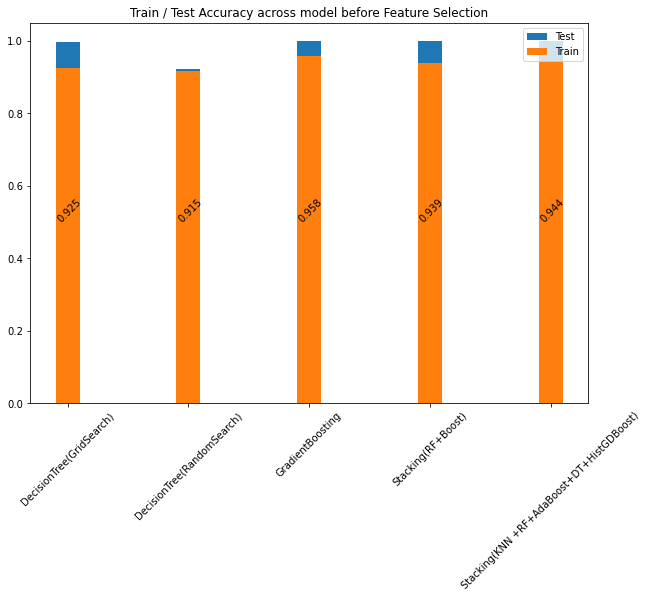

In [77]:
plt.rcParams["font.size"] = 10
test_values = [0.925, 0.915, 0.958, 0.939, 0.944, 0.958]
train_values = [0.996, 0.921, 1, 1, 1, 1]
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(before_fg_train.keys(), before_fg_train.values(), width=0.2, label='Train')
ax.bar(before_fg_train.keys(), before_fg_test.values(), width=0.2, label='Test',
      zorder=1)
plt.xticks(rotation = 45)
ax.text(-0.1, 0.5, "0.925", rotation = 45)
ax.text(0.9, 0.5, "0.915", rotation = 45)
ax.text(1.9, 0.5, "0.958", rotation = 45)
ax.text(2.9, 0.5, "0.939", rotation = 45)
ax.text(3.9, 0.5, "0.944", rotation = 45)
#ax.text(4.9, 0.5, "0.958", rotation = 45)
ax.legend(labels = ["Test", "Train"])
plt.title("Train / Test Accuracy across model before Feature Selection")

Text(0.5, 1.0, 'Train / Test Accuracy across model AFTER Feature Selection')

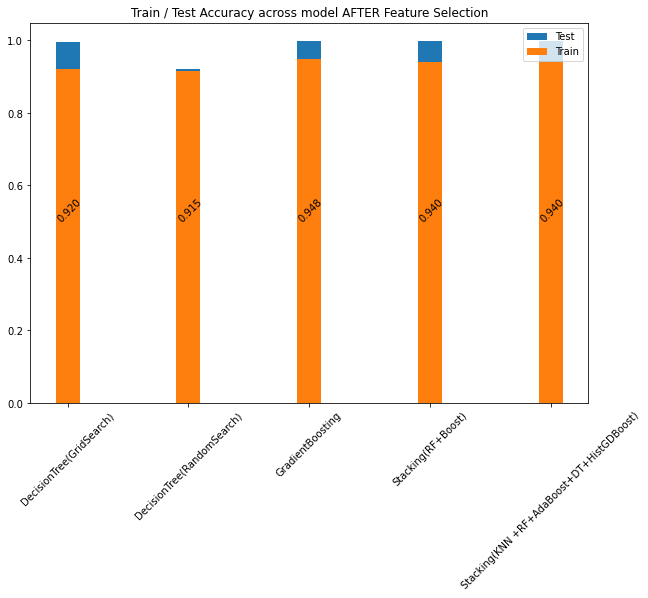

In [78]:
plt.rcParams["font.size"] = 10
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(after_fg_train.keys(), after_fg_train.values(), width=0.2, label='Train')
ax.bar(after_fg_train.keys(), after_fg_test.values(), width=0.2, label='Test',
      zorder=1)
plt.xticks(rotation = 45)
#plt.ylim(0.8, 1)
ax.text(-0.1, 0.5, "0.920", rotation = 45)
ax.text(0.9, 0.5, "0.915", rotation = 45)
ax.text(1.9, 0.5, "0.948", rotation = 45)
ax.text(2.9, 0.5, "0.940", rotation = 45)
ax.text(3.9, 0.5, "0.940", rotation = 45)
#ax.text(4.9, 0.5, "0.958", rotation = 45)
ax.legend(labels = ["Test", "Train"])
plt.title("Train / Test Accuracy across model AFTER Feature Selection")

Text(0.5, 1.0, 'Test Accuracy across model BEFORE / AFTER Feature Selection')

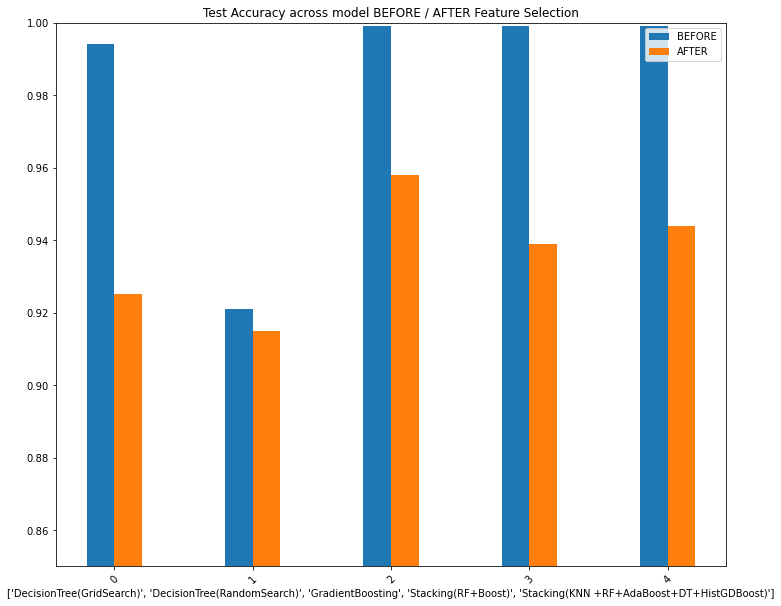

In [79]:
plt.rcParams["font.size"] = 10
fig, ax = plt.subplots(figsize=(12,10))
X = np.arange(len(after_fg_train.keys()))
plt.xlabel(list(after_fg_train.keys()))
ax.bar(X-0.1, after_fg_train.values(), width = 0.2, label='AFTER')
ax.bar(X+0.1, before_fg_test.values(), width = 0.2, label='BEFORE')
plt.xticks(rotation = 45)
plt.ylim(0.85, 1)
#ax.text(-0.1, 0.5, "0.920", rotation = 45)
#ax.text(0.9, 0.5, "0.915", rotation = 45)
#ax.text(1.9, 0.5, "0.948", rotation = 45)
#ax.text(2.9, 0.5, "0.940", rotation = 45)
#ax.text(3.9, 0.5, "0.940", rotation = 45)
#ax.text(4.9, 0.5, "0.958", rotation = 45)
ax.legend(labels = ["BEFORE", "AFTER"])
plt.title("Test Accuracy across model BEFORE / AFTER Feature Selection")

In [ ]:
plt.rcParams["font.size"] = 10
fig, ax = plt.subplots(figsize=(12,10))
X = np.arange(len(after_fg_train.keys()))
plt.xlabel(list(after_fg_train.keys()))
ax.bar(X-0.1, after_fg_train.values(), width = 0.2, label='AFTER')
ax.bar(X+0.1, before_fg_test.values(), width = 0.2, label='BEFORE')
plt.xticks(rotation = 45)
plt.ylim(0.85, 1)
#ax.text(-0.1, 0.5, "0.920", rotation = 45)
#ax.text(0.9, 0.5, "0.915", rotation = 45)
#ax.text(1.9, 0.5, "0.948", rotation = 45)
#ax.text(2.9, 0.5, "0.940", rotation = 45)
#ax.text(3.9, 0.5, "0.940", rotation = 45)
#ax.text(4.9, 0.5, "0.958", rotation = 45)
ax.legend(labels = ["BEFORE", "AFTER"])
plt.title("Test Accuracy across model BEFORE / AFTER Feature Selection")